### Over View

#### I will predict employee salaries from different employee characteristics (or features) using multiple regression.



#### I have imported the necessary packages

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

#### I have imported the CSV file that has all the necessary data.

In [2]:
df = pd.read_csv('salary.csv')

#### I will now check if there are any NaN values and if the data needs pre-processing

In [3]:
df.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,2.926070,12.852140,7.052529,0.948521,0.964981,0.044747,2.132296,0.750973,2.529183,6.982490
std,12685.132358,4.791397,9.444695,6.414771,0.149380,0.184008,0.206950,0.820075,0.432871,1.127420,16.873156
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,0.500000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


In [4]:
df.isnull().any()

salary          True
exprior        False
yearsworked    False
yearsrank      False
market         False
degree         False
otherqual      False
position       False
male           False
Field          False
yearsabs       False
dtype: bool

### Clean the data

#### After exploring the data I realized that there was one value that was missing from the predictor variable ( salary )
#### This requires me to drop that entire row because using an average salary would create an inaccurate prediction.

In [5]:
df = df.dropna(axis = 0)

In [6]:
df.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,50863.220098,2.931774,12.836257,7.046784,0.948558,0.964912,0.044834,2.130604,0.750487,2.526316,6.994152
std,12685.132358,4.794327,9.447040,6.419708,0.149524,0.184181,0.207142,0.819977,0.433153,1.126644,16.887552
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,1.000000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


In [7]:
df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


### Split your data into a training and test set. Train your model using the training set and use multiple linear regression to predict salary from all the variables in the training dataset.

#### I split my data 80/20 to allow for a more accurate prediction when I run my model on the test set. It is not necessary to have a lot of testing data but it is important to have a lot of training data.

In [8]:
y = df['salary']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=25)

In [10]:
model = smf.ols(formula='salary ~ yearsworked + yearsrank + market + position', data=X_train).fit() 
model.params

Intercept      -6022.889386
yearsworked     -354.270402
yearsrank       1042.343698
market         34131.561016
position       10279.204975
dtype: float64

### 1.Create scatterplots, histograms, and a descriptive statistics table of the variables of interest.

#### Histograms

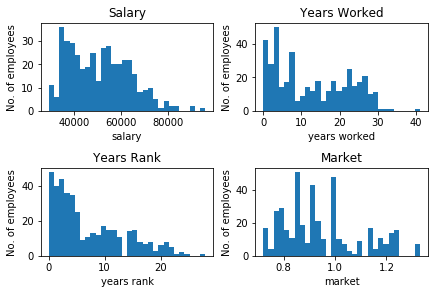

In [35]:
fig = plt.figure()

plt.subplot(2, 2, 1)
plt.hist(X_train['salary'], bins=30)
plt.xlabel('salary')
plt.ylabel('No. of employees')
plt.title('Salary')

plt.subplot(2, 2, 2)
plt.hist(X_train['yearsworked'], bins=30)
plt.xlabel('years worked')
plt.ylabel('No. of employees')
plt.title('Years Worked')

plt.subplot(2, 2, 3)
plt.hist(X_train['yearsrank'], bins=30)
plt.xlabel('years rank')
plt.ylabel('No. of employees')
plt.title('Years Rank')

plt.subplot(2, 2, 4)
plt.hist(X_train['market'], bins=30)
plt.xlabel('market')
plt.ylabel('No. of employees')
plt.title('Market')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

plt.show()

#### The salary histogram shows that majority of employees earn between 20000 and 60000.
#### The years worked histogram shows that there are a lot of employees with 0 to 10 years of work experience.
#### The years rank histogram describes how many years an employee has worked at their current rank. This histogram shows that a large number of employees have been at their current rank for 0 to 5 years.
#### The market histogram shows market value salaries. If the number is 1 the salary earned is at market value, if the number is less than one the salary earned is lower than market value and if the number is higher than 1 the salary is higher than market value. The histogram shows that a lot of the employees are paid below market value.

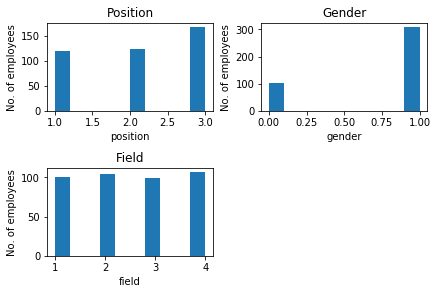

In [39]:
plt.subplot(2, 2, 1)
plt.hist(X_train['position'])
plt.xlabel('position')
plt.ylabel('No. of employees')
plt.title('Position')

plt.subplot(2, 2, 2)
plt.hist(X_train['male'])
plt.xlabel('gender')
plt.ylabel('No. of employees')
plt.title('Gender')

plt.subplot(2, 2, 3)
plt.hist(X_train['Field'])
plt.xlabel('field')
plt.ylabel('No. of employees')
plt.title('Field')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

plt.show()

#### In the position histogram 1 shows juniour employees, 2 shows managers and 3 shows executives. From the histogram we can see that majority of the employees in our data set are executives followed by managers then juniours.
#### In the gender histogram 0 shows women and 1 shows men. The histogram clearly shows that majority of the employees are male.
#### In the field histogram 1 shows the engineering field, 2 shows the finacne field, 3 shows the human resource field and 4 shows the marketing field. From the histogram I can see that there is a relatively equal distribution of employees in all these fields.

#### Scatterplots

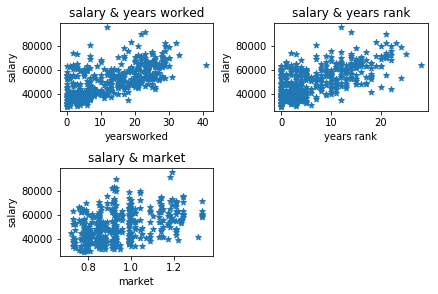

In [51]:
plt.subplot(2,2,1)
plt.scatter(x = X_train['yearsworked'], y= X_train['salary'], marker='*')
plt.xlabel('yearsworked')
plt.ylabel('salary')
plt.title('salary & years worked')

plt.subplot(2,2,2)
plt.scatter(x = X_train['yearsrank'], y= X_train['salary'], marker='*')
plt.xlabel('years rank')
plt.ylabel('salary')
plt.title('salary & years rank')

plt.subplot(2,2,3)
plt.scatter(x = X_train['market'], y= X_train['salary'], marker='*')
plt.xlabel('market')
plt.ylabel('salary')
plt.title('salary & market')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

plt.show()

#### The scatterplot salary & years worked shows the positive correlation between salary and years worked. So as years worked increases so does an employees salary.
#### The scatterplot salary & years rank shows that when an employee stays in a particular position for a longer amount of time their salary increases.
#### The salary & market scatterplot shows that majority of employees earn less than they should

#### I did compare the other variables to salaries because the plots were not linear

#### Descriptive statistics

In [49]:
df.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,50863.220098,2.931774,12.836257,7.046784,0.948558,0.964912,0.044834,2.130604,0.750487,2.526316,6.994152
std,12685.132358,4.794327,9.447040,6.419708,0.149524,0.184181,0.207142,0.819977,0.433153,1.126644,16.887552
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,1.000000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


#### The descriptive statistics show some interesting insights, 
- There are 513 observations,
- The mean of the salaries column is 50863.22
- The average years worked is 13

### 2.One-hot encode the variable Field into three dummy variables, using HR as the reference category. You can use pandas' get_dummies() function for this.

In [18]:
dummies = pd.get_dummies(X_train['Field'])
dummies.head()

,1,2,3,4
347,0,1,0,0
419,0,1,0,0
48,0,0,1,0
498,0,0,0,1
175,0,1,0,0


In [53]:
dummies = dummies.rename(columns={1 : 'Engineering', 2 : 'Finance', 3 : 'Human Resources', 4 : 'Marketing'})
dummies.head()

,Engineering,Finance,Human Resources,Marketing
347,0,1,0,0
419,0,1,0,0
48,0,0,1,0
498,0,0,0,1
175,0,1,0,0


### Produce a correlation matrix comparing the relationship of salary to the predictor variables. Is there any multicollinearity or other problems that may be a problem in the multiple regression?

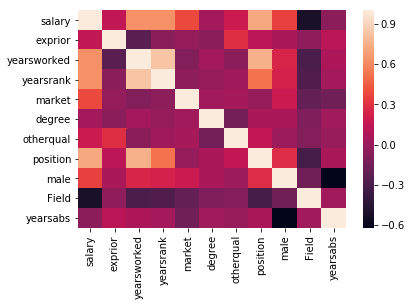

In [20]:
import seaborn as sns
corr = X_train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [21]:
X_train.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.148619,0.631117,0.627192,0.380384,0.041520,0.184346,0.723249,0.356370,-0.507493,-0.054338
exprior,0.148619,1.000000,-0.236121,-0.059512,-0.012749,-0.047164,0.286410,0.131379,0.068870,-0.035072,0.120604
yearsworked,0.631117,-0.236121,1.000000,0.830470,-0.083028,0.035889,-0.058089,0.755183,0.249265,-0.300256,0.075293
yearsrank,0.627192,-0.059512,0.830470,1.000000,-0.038584,-0.015935,0.022289,0.522656,0.231282,-0.280981,0.041915
market,0.380384,-0.012749,-0.083028,-0.038584,1.000000,0.030457,0.049937,-0.017049,0.186278,-0.197386,-0.152809
degree,0.041520,-0.047164,0.035889,-0.015935,0.030457,1.000000,-0.141242,0.058268,0.060172,-0.097504,0.026247
otherqual,0.184346,0.286410,-0.058089,0.022289,0.049937,-0.141242,1.000000,0.157097,0.011995,-0.077983,-0.000014
position,0.723249,0.131379,0.755183,0.522656,-0.017049,0.058268,0.157097,1.000000,0.283982,-0.318408,0.059064
male,0.356370,0.068870,0.249265,0.231282,0.186278,0.060172,0.011995,0.283982,1.000000,-0.148948,-0.619781
Field,-0.507493,-0.035072,-0.300256,-0.280981,-0.197386,-0.097504,-0.077983,-0.318408,-0.148948,1.000000,0.027344


### Run the multiple linear regression and interpret the standardised coefficients given in the statsmodels output. What are the most important features when predicting employee salary?

In [22]:
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     364.1
Date:                Fri, 28 Jun 2019   Prob (F-statistic):          1.18e-132
Time:                        09:47:11   Log-Likelihood:                -4151.3
No. Observations:                 410   AIC:                             8313.
Df Residuals:                     405   BIC:                             8333.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6022.8894   2103.222     -2.864      

### The most important features when predicting employee salariers are Years worked, position, years rank, market

### Calculate the standardised residuals (resid()) and standardised predicted values (fittedvalues()).

In [23]:
standardized_residuals = model.resid
standardised_predicted_values = model.fittedvalues

print(standardized_residuals.head())
print(standardised_predicted_values.head())

347   -6549.544379
419    1338.998114
48     1771.677196
498   -1309.566586
175    8230.224316
dtype: float64
347    69886.544379
419    33264.001886
48     31908.322804
498    53755.566586
175    48021.775684
dtype: float64


### Plot the residuals versus the predicted values using seaborn's residplot with fitted values as the x parameter, and the dependent variable as y. lowess=True.

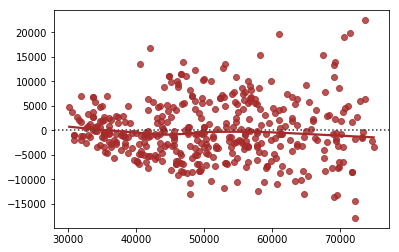

In [24]:
sns.residplot(standardised_predicted_values, standardized_residuals, lowess=True, color="brown")

### How does your model compare when running it on the test set - what is the difference in the Root Mean Square Error (RMSE) between the training and test sets?

In [25]:
test_model = smf.ols(formula='salary ~ yearsworked + yearsrank + market + position', data=X_test).fit() 
test_model.params

Intercept      -7102.468626
yearsworked      -99.631323
yearsrank        744.648351
market         38653.766938
position        7768.364305
dtype: float64

In [26]:
prediction = test_model.predict(X_train)
RMSE_train = np.sqrt(mean_squared_error(y_train, prediction))
RMSE_train

6358.668980083311

In [27]:
test_predictions = test_model.predict(X_test)
RMSE_test = np.sqrt(mean_squared_error(y_test, test_predictions))
RMSE_test

5502.412229437346

In [28]:
RMSE_difference = RMSE_train - RMSE_test
RMSE_difference


856.2567506459654

### RMSE for my test set was 5502.412229437346 and 6358.668980083311 for my training set. This is a 856.2567506459654 difference